In [2]:
import pandas as pd
import lifelines

data = lifelines.datasets.load_dd()

In [2]:
data.sample(6)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
1706,United Kingdom,200,200.0,Northern Europe,Europe,Edward Heath,Edward Heath.United Kingdom.1970.1973.Parliame...,Democracy,Parliamentary Dem,1970,4,1
615,Greece,350,350.0,Southern Europe,Europe,Ioannis Paraskevopoulos,Ioannis Paraskevopoulos.Greece.1966.1966.Parli...,Democracy,Parliamentary Dem,1966,1,1
654,Guinea,438,438.0,Western Africa,Africa,Moussa Dadis Camara,Moussa Dadis Camara.Guinea.2008.2008.Military ...,Non-democracy,Military Dict,2008,1,0
132,Belgium,211,211.0,Western Europe,Europe,Jean-Luc Dehaene,Jean-Luc Dehaene.Belgium.1992.1998.Parliamenta...,Democracy,Parliamentary Dem,1992,7,1
1281,Poland,290,290.0,Eastern Europe,Europe,Jozef Oleksy,Jozef Oleksy.Poland.1995.1995.Mixed Dem,Democracy,Mixed Dem,1995,1,1
1210,Palau,986,986.0,Micronesia,Oceania,Kuniwo Nakamura,Kuniwo Nakamura.Palau.1994.2000.Presidential Dem,Democracy,Presidential Dem,1994,7,1


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

In [8]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

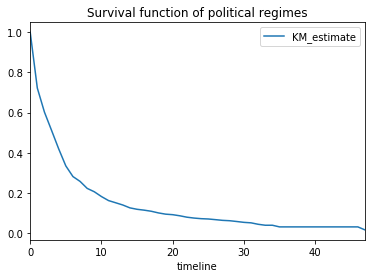

In [13]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

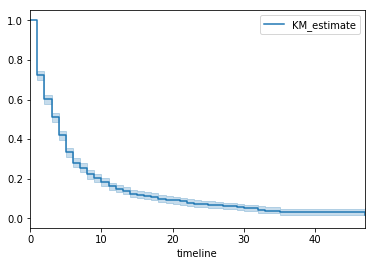

In [15]:
kmf.plot()

In [16]:
kmf.median_

4.0

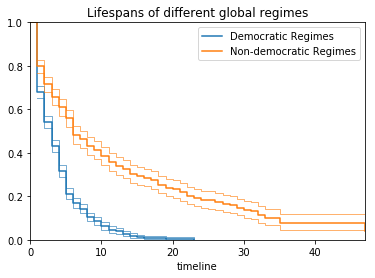

In [19]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

In [25]:
import numpy as np

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


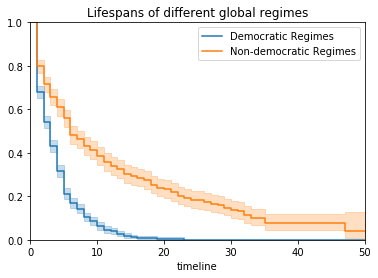

In [26]:
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different global regimes");

In [27]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

Results
   t 0: -1
   test: logrank
   alpha: 0.99
   null distribution: chi squared
   df: 1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00000 |            260.470 |      Reject Null    |        True       


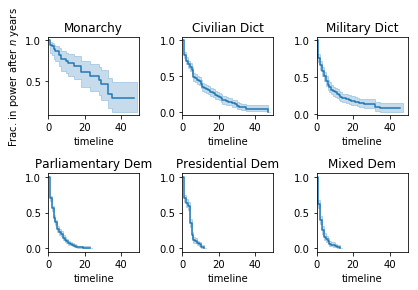

In [32]:
regime_types = data['regime'].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i+1)
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()

In [33]:
from lifelines import AalenAdditiveFitter
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [34]:
import patsy
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')

In [35]:
X.columns

Index(['un_continent_name[Africa]', 'un_continent_name[Americas]',
       'un_continent_name[Asia]', 'un_continent_name[Europe]',
       'un_continent_name[Oceania]', 'regime[T.Military Dict]',
       'regime[T.Mixed Dem]', 'regime[T.Monarchy]',
       'regime[T.Parliamentary Dem]', 'regime[T.Presidential Dem]',
       'start_year'],
      dtype='object')

In [36]:
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)

In [37]:
data = lifelines.datasets.load_dd()

X['T'] = data['duration']
X['E'] = data['observed']

In [38]:
aaf.fit(X, 'T', event_col='E')

 [-----------------100%-----------------] 1468 of 1468 complete in 1.1 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

In [42]:
#aaf.figsize(12.5, 8)
aaf.cumulative_hazards_.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,baseline
1,-0.051595,-0.082406,0.010666,0.154493,-0.060438,0.075333,0.086274,-0.133938,0.048077,0.127171,0.000116,-0.029280
2,-0.014713,-0.039471,0.095668,0.194251,-0.092696,0.115033,0.358702,-0.226233,0.168783,0.121862,0.000053,0.143039
3,0.007389,-0.064758,0.115121,0.170549,0.069371,0.161490,0.677347,-0.271183,0.328483,0.146234,0.000004,0.297672
4,-0.058418,0.011399,0.091784,0.205824,0.125722,0.220028,0.932674,-0.294900,0.365604,0.422617,0.000002,0.376311
5,-0.099282,0.106641,0.112083,0.150708,0.091900,0.241575,1.123860,-0.391103,0.536185,0.743913,0.000057,0.362049


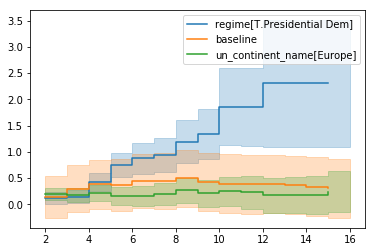

In [47]:
aaf.plot(columns=['regime[T.Presidential Dem]', 'baseline', 'un_continent_name[Europe]'], iloc=slice(1,15), figsize=(25,16))

In [49]:
ix = (data['ctryname'] == 'Canada') & (data['start_year'] == 2006)
harper = X.loc[ix]
print("Harper's unique data point", harper)

Harper's unique data point      un_continent_name[Africa]  un_continent_name[Americas]  \
268                        0.0                          1.0   

     un_continent_name[Asia]  un_continent_name[Europe]  \
268                      0.0                        0.0   

     un_continent_name[Oceania]  regime[T.Military Dict]  regime[T.Mixed Dem]  \
268                         0.0                      0.0                  0.0   

     regime[T.Monarchy]  regime[T.Parliamentary Dem]  \
268                 0.0                          1.0   

     regime[T.Presidential Dem]  start_year  T  E  
268                         0.0      2006.0  3  0  


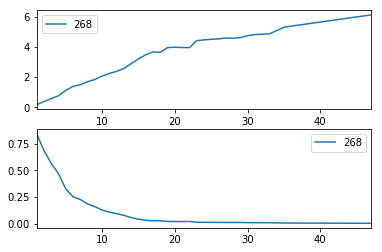

In [50]:
ax = plt.subplot(2,1,1)

aaf.predict_cumulative_hazard(harper).plot(ax=ax)
ax = plt.subplot(2,1,2)

aaf.predict_survival_function(harper).plot(ax=ax);

In [4]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print(df.head())
"""
    T  E    group
0   6  1  miR-137
1  13  1  miR-137
2  13  1  miR-137
3  13  1  miR-137
4  19  1  miR-137
"""

T = df['T']
E = df['E']

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succiently, kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [7]:
%matplotlib inline

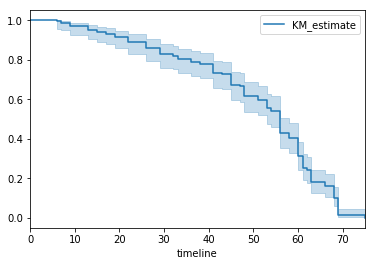

In [8]:
kmf.survival_function_
kmf.median_
kmf.plot()

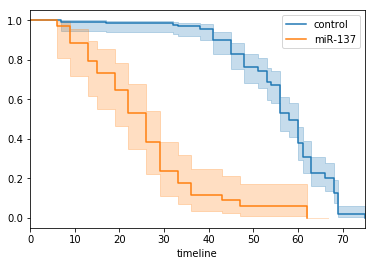

In [9]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

In [10]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 163 observations, 7 censored>

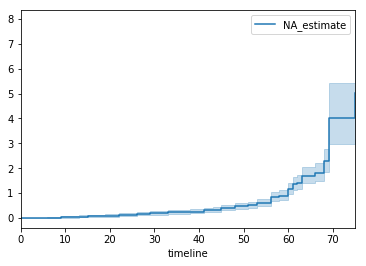

In [11]:
naf.plot()

In [12]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.2214     1.2478    0.0743 2.9807 0.0029      0.0758      0.3670  **
var2 0.0508     1.0521    0.0829 0.6129 0.5400     -0.1117      0.2133    
var3 0.2187     1.2444    0.0758 2.8851 0.0039      0.0701      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580


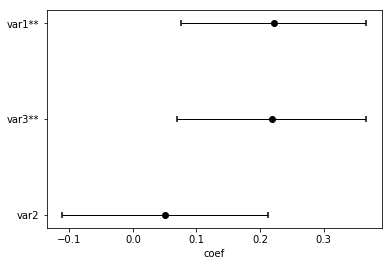

In [13]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()

"""
n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95
var1 0.2213     1.2477    0.0743 2.9796 0.0029      0.0757      0.3669  **
var2 0.0509     1.0522    0.0829 0.6139 0.5393     -0.1116      0.2134
var3 0.2186     1.2443    0.0758 2.8836 0.0039      0.0700      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Concordance = 0.580
"""

cph.plot()

In [14]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

 [-----------------100%-----------------] 189 of 189 complete in 0.1 sec


<lifelines.AalenAdditiveFitter: fitted with 200 observations, 11 censored>

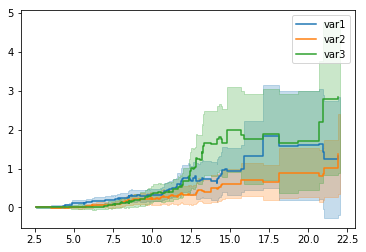

In [16]:
aaf.plot()

In [17]:
aaf.confidence_intervals_

var1      var2      var3
upper 2.576258   0.000502  0.000011  0.028394
      2.632263   0.001258  0.002329  0.028060
      3.563356   0.052441  0.004782  0.034177
      3.640364   0.054325  0.007745  0.034498
      4.144414   0.054199  0.011798  0.034531
      4.207421   0.052486  0.016474  0.036517
      4.326433   0.073455  0.017764  0.034307
      4.382438   0.084647  0.015539  0.037425
      4.445445   0.097601  0.016968  0.034423
      4.473447   0.101696  0.016420  0.033894
      4.480448   0.101191  0.015625  0.054429
      4.704470   0.099258  0.023993  0.053524
      4.725473   0.106781  0.023788  0.051717
      4.746475   0.104049  0.023317  0.062403
      4.837484   0.132529  0.022674  0.058084
      4.858486   0.136507  0.036746  0.054688
      4.879488   0.187895  0.034519  0.049006
      4.949495   0.188275  0.034027  0.051492
      5.271527   0.191544  0.032734  0.052594
      5.292529   0.187827  0.029221  0.076437
      5.432543   0.185867  0.031602  0.078097
      5.558556   0.185920  0.049854  0.075782
      5.642564   0.185606  0.048162  0.081519
      5.663566   0.189106  0.063905  0.079948
      5.740574   0.201764  0.065352  0.075870
      5.810581   0.202680  0.095405  0.074308
      5.817582   0.219037  0.094915  0.070593
      6.062606   0.223850  0.094654  0.069698
      6.083608   0.223259  0.095393  0.071886
      6.125613   0.224344  0.098881  0.070008
...                   ...       ...       ...
lower 12.657266  0.362304  0.079475  0.467470
      12.678268  0.358419  0.077015  0.486471
      12.769277  0.393298  0.081137  0.518841
      12.797280  0.336936  0.083128  0.586095
      12.825283  0.225429  0.110964  0.660547
      12.874287  0.222645  0.145175  0.619151
      12.923292  0.221089  0.166592  0.614141
      13.056306  0.253155  0.165916  0.607474
      13.182318  0.239632  0.131988  0.694433
      13.217322  0.279942  0.140155  0.668723
      13.287329  0.254123  0.117425  0.768432
      13.329333  0.254464  0.106194  0.832105
      13.812381  0.190406  0.147918  0.814245
      14.162416  0.143153  0.162649  0.881158
      14.183418  0.202937  0.130680  0.916838
      14.246425  0.234651  0.154535  0.918367
      14.302430  0.266119  0.171977  0.959483
      14.407441  0.319090  0.201657  0.886754
      14.484448  0.386620  0.226834  0.791328
      14.680468  0.391145  0.241854  0.786866
      14.785479  0.330874  0.238235  0.902361
      15.723572  0.387001  0.290172  0.720795
      15.884588  0.436931  0.287795  0.611046
      17.095710  0.508944  0.204054  0.707661
      18.131813  0.185252  0.243984  0.384008
      19.370937  0.198935  0.259783  0.449923
      20.666067  0.230153  0.151716  0.620287
      20.981098 -0.033581  0.194239  0.829940
      21.030103 -0.268506  0.280835  0.831180
      21.940194 -0.192067  0.347879  0.880485

[358 rows x 3 columns]

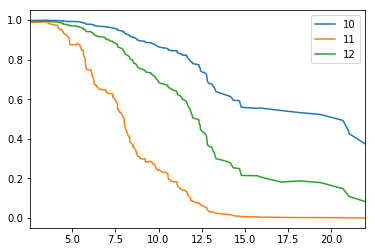

In [21]:
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:13]).plot()  # get the unique survival functions of two subjects

In [20]:
X.head()

,var1,var2,var3
0,0.595170,1.143472,1.571079
1,0.209325,0.184677,0.356980
2,0.693919,0.071893,0.557960
3,0.443804,1.364646,0.374221
4,1.613324,0.125566,1.921325
